In [14]:
import random

from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
training_set, testing_set = mnist.load_data()
x_train, y_train = training_set
x_test, y_test = testing_set

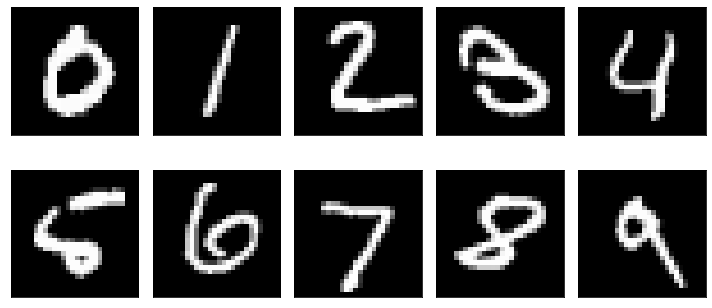

In [3]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))
for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(x_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

In [5]:
model = Sequential()

In [6]:
hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
def create_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

In [9]:
# Reshape
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [10]:
# Normalize
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train_reshaped, x_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0749
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0654
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 2s 996us/step - loss: 0.0613


In [13]:
output = model.predict(x_test_reshaped)

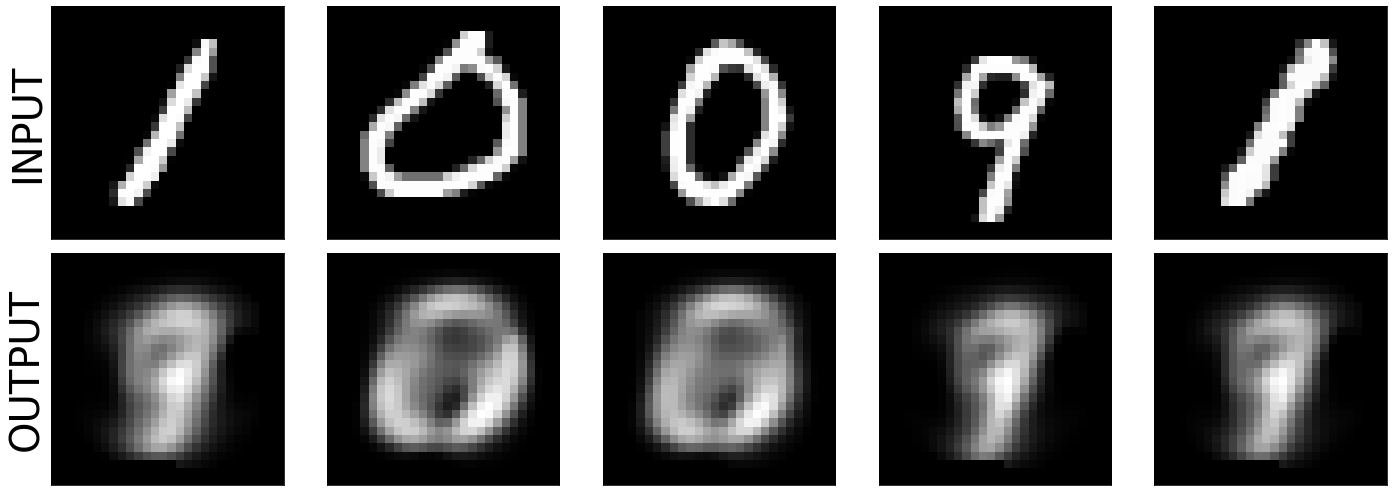

In [15]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel('INPUT', size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel('OUTPUT', size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [32]:
hiddenLayerSize_2_model = create_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_autoencoder(hidden_layer_size=32)

In [33]:
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

In [34]:
output_2_model = hiddenLayerSize_2_model.predict(x_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(x_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(x_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(x_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(x_test_reshaped)

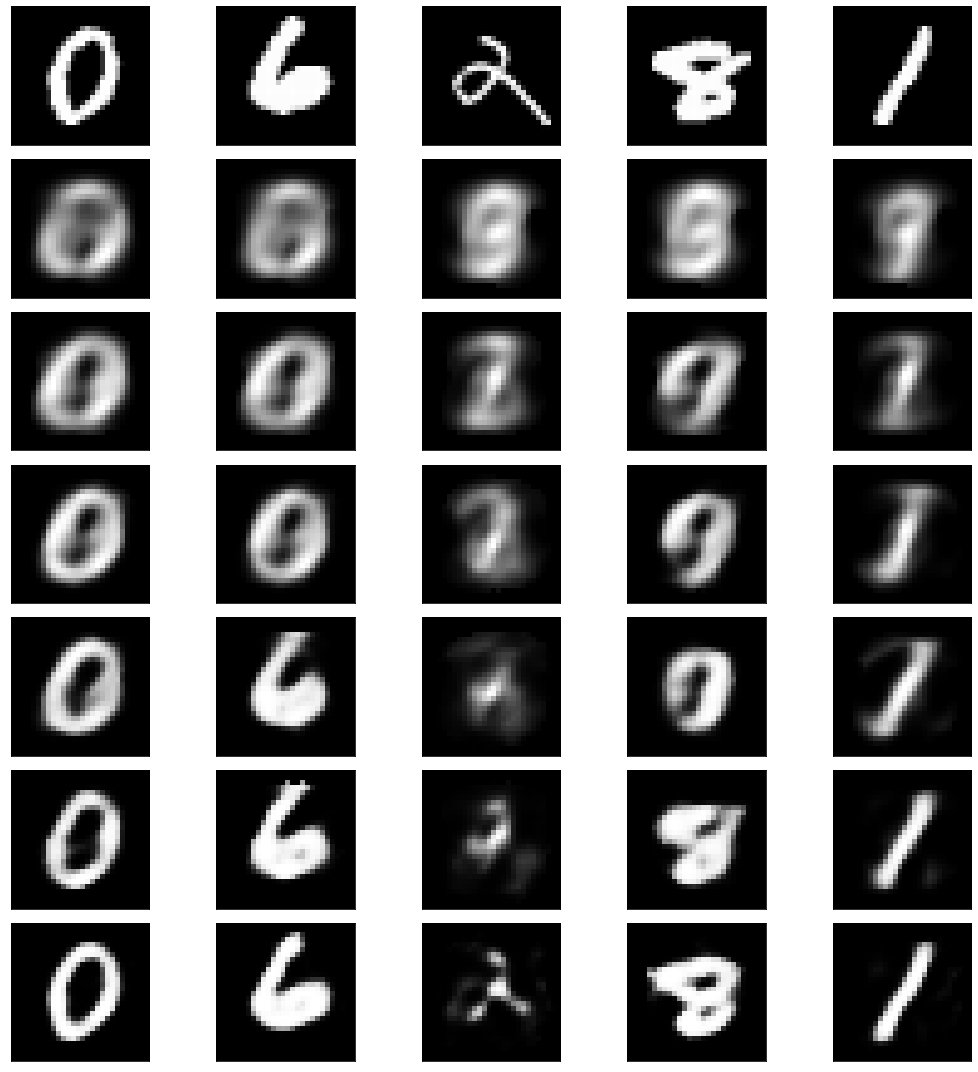

In [35]:
fig, axes = plt.subplots(7, 5, figsize=(15,15))

randomly_selected_imgs = random.sample(range(output_2_model.shape[0]),5)
outputs = [x_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()